# Anirudh Khatry - B. Tech. I.T.
## Veermata Jijabai Technological Institute, India

#### The Python file for downloading STL10 - https://github.com/mttk/STL10/blob/master/stl10_input.py

In [ ]:
# Importing all the libraries that are required

import matplotlib.pyplot as plt
import stl10_input

!pip uninstall -y tensorflow

# Using tensorflow 1
!pip install tensorflow==1.14
!pip install tensorflow-gpu==1.14

import tensorflow.keras as keras

sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)
Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 109.3MB 37kB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 3.2MB 38.5MB/s 
     |████████████████████████████████| 491kB 40.0MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
     |████████████████████████████████| 377.1MB 44kB/s 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
# Downloading the STL-10 dataset. 
!python /content/stl10_input.py   

sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [ ]:
#Loading the train and test images 
train_images = stl10_input.read_all_images('/content/data/stl10_binary/train_X.bin')
train_labels = stl10_input.read_labels('/content/data/stl10_binary/train_y.bin')
test_images = stl10_input.read_all_images('/content/data/stl10_binary/test_X.bin')
test_labels = stl10_input.read_labels('/content/data/stl10_binary/test_y.bin')

In [ ]:
labels = {0: 'airplane',1: 'bird',2: 'car',3: 'cat',4: 'deer',5: 'dog',6: 'horse',7: 'monkey',8: 'ship',9: 'truck'}

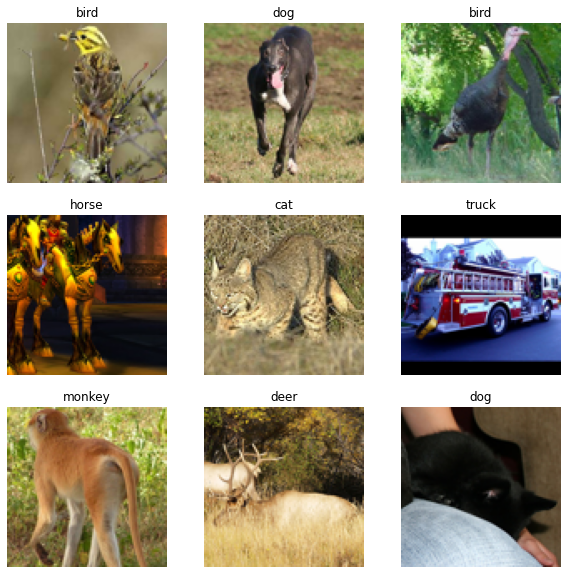

In [ ]:
# Plotting images 

plt.figure(figsize=(10, 10))
for i, image, label in zip(range(9), train_images, train_labels):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(labels[label - 1])
    plt.axis("off")

In [ ]:
# Converting the range to 0 - 9.

train_y = train_labels - 1
test_y = test_labels - 1

In [ ]:
# Preprocessing the images 
X_train = keras.applications.resnet50.preprocess_input(train_images)
X_test = keras.applications.resnet50.preprocess_input(test_images)

#Coverting the labels into categorical
y_train = keras.utils.to_categorical(train_y, 0)
y_test = keras.utils.to_categorical(test_y, 0)

In [ ]:
# Function to plot graphs for model accuracy and loss. 

def plot_history(history):

  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

## Using the pretrained Resnet50 model. 

In [ ]:
resnet_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

    8192/94653016 [..............................] - ETA: 2s

/usr/local/lib/python3.7/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


## Model 1 : Freezing in initial 5 epochs

We freeze the model for initial epochs to prevent damage to the pretrained weights due to high gradient of the layers added after.  

In [ ]:
resnet_model.trainable = False

Adding extra layers
1. Adding a Global Average Pooling Layer 
2. Adding a Dropout layer for regularization so that the model does not overfit
3. Using the test images as the validation dataset to check the performance of the model. 

In [ ]:
inputs = keras.Input(shape=(96, 96, 3))
x = resnet_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________
None
Train on 5000 samples, validate on 8000 samples
Epoch 1/5
5000/5000 [==============================] - 12

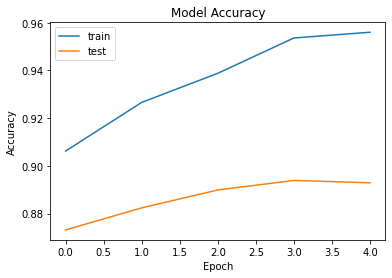

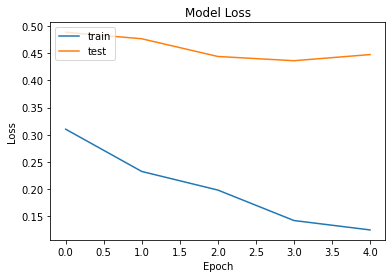

In [ ]:
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

plot_history(history)

Now unfreezing the model and using lower learning rate to prevent drastic changes 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________
None
Train on 5000 samples, validate on 8000 samples
Epoch 1/3
5000/5000 [==============================] - 28

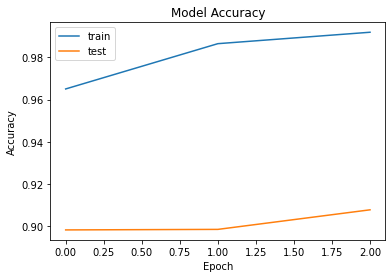

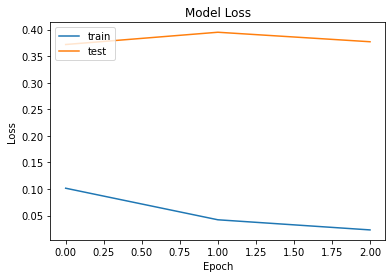

In [ ]:
resnet_model.trainable = True
 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.00001), metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, batch_size=32, epochs=3, validation_data=(X_test, y_test))

plot_history(history)

## Model 2 Without Freezing

## Using a high learning rate 

/usr/local/lib/python3.7/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________
None
Train on 5000 samples, validate on 8000 samples
Epoch 1/10
5000/5000 [==============================] -

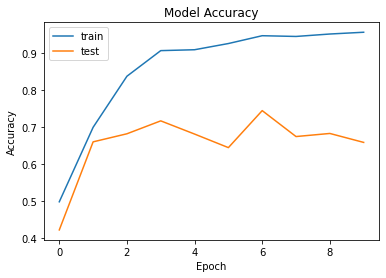

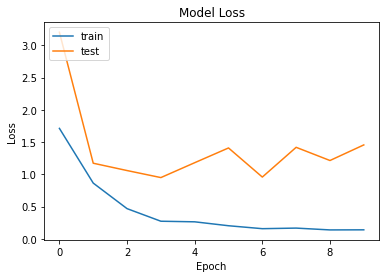

In [ ]:
resnet_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
resnet_model.trainable = True

inputs = keras.Input(shape=(96, 96, 3))
x = resnet_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

plot_history(history)

Model gives low accuracy on validation set since pretrained weights are changed drastically due to high learning rate and the spikes imply that the model is beginning to diverge.

## Using low learning rate


/usr/local/lib/python3.7/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________
None
Train on 5000 samples, validate on 8000 samples
Epoch 1/10
5000/5000 [==============================] -

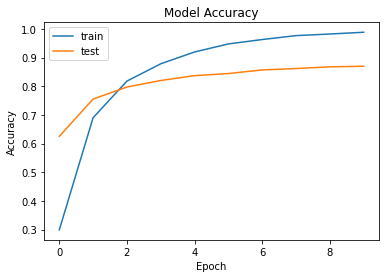

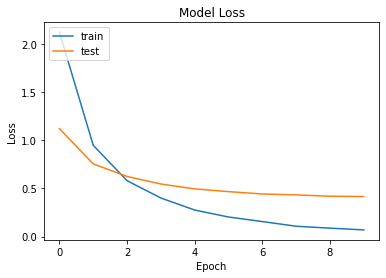

In [ ]:
resnet_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
resnet_model.trainable = True
inputs = keras.Input(shape=(96, 96, 3))
x = resnet_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.00001), metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

plot_history(history)

Good performance but takes more epochs as compared to the first model which used freezing for intial epochs

# Results 

1. Transfer learning is the fastest approach to obtain high accuracies
2. Low learning rate also gives good results but takes more time.
3. Also, for the same architecture, the model that uses transfer learning with freezed layers has the least tendency to get overfit as illustrated by the difference in the train and validation accuracies of each of the model.

Further improvement may be done by using data augmentation techniques and hyperparameter tuning.